# Introduction And Problem Statement
As one of the top ten rice producing and consuming countries in the world, India depends greatly on rice for its economy and for meeting its food demands. To ensure healthy and proper growth of the rice plants it is essential to detect any disease in time and prior to applying required treatment to the affected plants. Since manual detection of diseases costs a large amount of time and labour, it is inevitably prudent to have an automated system.Our work on rice leaf disease detection system using machine learning approaches.Three of the most common rice plant diseases namely leaf smut, bacterial leaf blight and brown spot diseases are detected in this work.

Data Contains 120 jpg images of various sizes.
3 classes : 0:Brown Spot, 1:Bacterial leaf blight, 2:Leaf smut,
40 images per class.

## Problem Statement
 Perform exploratory data analysis and build a Deep Learnig model to classify rice diseases from the rice-diseases-image-dataset.


## List Of Contents
   ### 1. Importing Libraries
   ### 2. Data Collection
   ### 3. Plotting Images
   ### 4. Image Augmentation
   ### 5. Creating CNN architecture with Transfer Learning Technique
   ### 6. Model Training
   ### 7. Model Evaluation
   ### 8. Evaluation Summary
   ### 9. Conclusion

## Importing Libraries

In [1]:
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
#importing basic libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing image processing libraries
import glob
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Collection

In [4]:
#defining data folder path
training_folder = 'C:/Users/sagar/Desktop/Data'
training_folder

'C:/Users/sagar/Desktop/Data'

In [5]:
#gathering images of different disease
brownspot = [training_folder + '/Brown spot/' + img for img in os.listdir(training_folder + '/Brown spot')]
Bacterial_leaf_blight = [training_folder + '/Bacterial leaf blight/' + img for img in os.listdir(training_folder + '/Bacterial leaf blight')]
Leaf_smut = [training_folder + '/Leaf smut/' + img for img in os.listdir(training_folder + '/Leaf smut')]

In [6]:
#selecting some of images to visualize
br_spt=brownspot[:9]
bac_lf_bt=Bacterial_leaf_blight[:9]
lf_smt=Leaf_smut[:9]

## Plotting Images

#### Brown Spot: What is brown spot disease and How to Identify?
Brown spot is a fungal disease that infects the coleoptile, leaves, leaf sheath, panicle branches, glumes, and spikelets. The disease can develop in areas with high relative humidity (86−100%) and temperature between 16 and 36°C. It is common in unflooded and nutrient-deficient soil, or in soils that accumulate toxic substances.

* Infected seedlings have small, circular, yellow brown or brown lesions that may girdle the coleoptile and distort primary and secondary leaves.
* Starting at tillering stage, lesions can be observed on the leaves. They are initially small, circular, and dark brown to purple-brown.
* Fully developed lesions are circular to oval with a light brown to gray center, surrounded by a reddish brown margin caused by the toxin produced by the fungi.

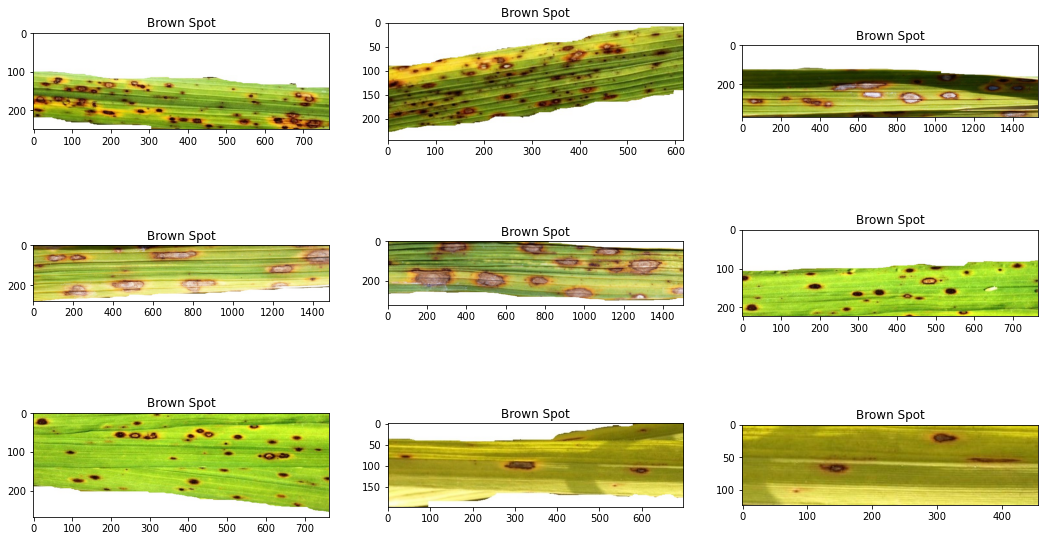

In [7]:
#Brown Spot
plt.figure(figsize=(18,10))
for i,k  in enumerate(br_spt):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

### Bacterial leaf blight: What is Bacterial leaf blight disease and How to Identify?
Bacterial blight is caused by Xanthomonas oryzae pv. oryzae. It causes wilting of seedlings and yellowing and drying of leaves.
It is commonly observed when strong winds and continuous heavy rains occur, allowing the disease-causing bacteria to easily spread through ooze droplets on lesions of infected plants.

* On older plants, lesions usually develop as water-soaked to yellow-orange stripes on leaf blades or leaf tips or on mechanically injured parts of leaves. Lesions have a wavy margin and progress toward the leaf base.
* On young lesions, bacterial ooze resembling a milky dew drop can be observed early in the morning. The bacterial ooze later on dries up and becomes small yellowish beads underneath the leaf.
* Old lesions turn yellow to grayish white with black dots due to the growth of various saprophytic fungi. On severely infected leaves, lesions may extend to the leaf sheath.

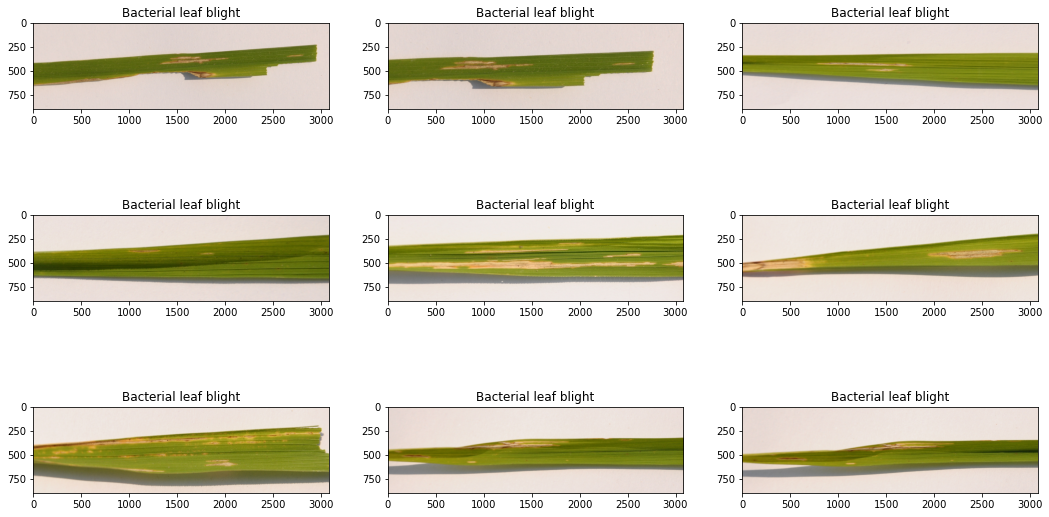

In [8]:
#Bacterial leaf blight
plt.figure(figsize=(18,10))
for i,k  in enumerate(bac_lf_bt):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Bacterial leaf blight")

### leaf Smut: What is leaf Smut disease and How to Identify?
Leaf smut causes chalkiness of grains which leads to reduction in grain weight. It also reduces seed germination.
Rain, high humidity, and soils with high nitrogen content also favors disease development. Wind can spread the fungal spores from plant to plant.False smut is visible only after panicle exsertion. It can infect the plant during flowering stage.


* Plants infected with false smut have individual rice grain transformed into a mass of spore balls. These spore balls are initially orange, and then turn into greenish black when these mature.
* In most cases, not all spikelets of a panicle are affected, but spikelets neighboring smut balls are often unfilled.


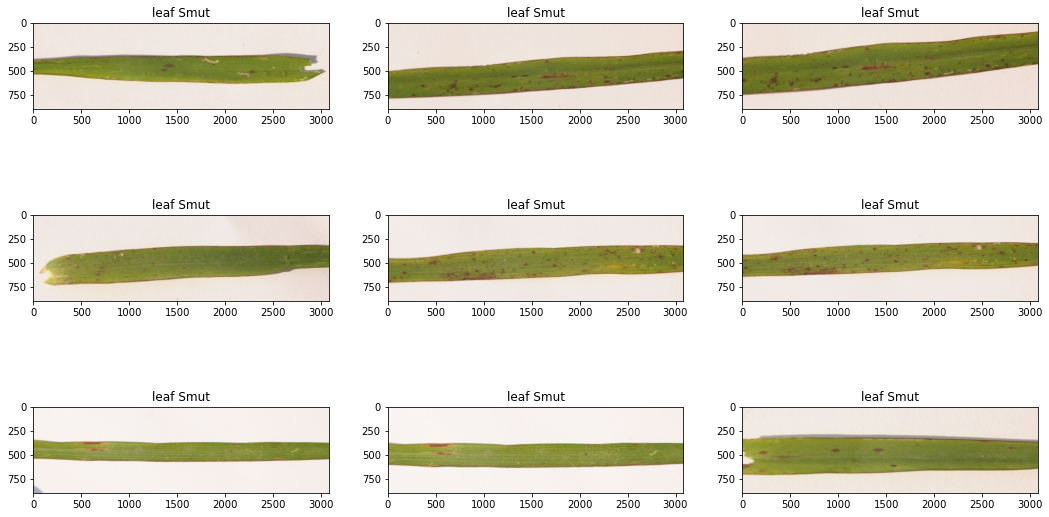

In [9]:
#leaf smut
plt.figure(figsize=(18,10))
for i,k  in enumerate(lf_smt):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("leaf Smut")

## Image Augmentation

In [10]:
#initializing the image size and input shape
image_size=299
input_shape=(image_size,image_size,3)

In [11]:
#Generating more number of images by changing some parameters
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode = 'nearest',
        channel_shift_range=0.5,
        brightness_range=[0.5,1.2],
        shear_range=0.5,
        rotation_range=25,
        zoom_range=[0.5, 1],
        validation_split=.2)

In [12]:
#Getting training images from the folders
train_set = train_datagen.flow_from_directory(
        training_folder,
        target_size=(image_size, image_size),
        shuffle=True,
        batch_size=20,
        class_mode='categorical',
        subset='training',
        seed=52)


Found 96 images belonging to 4 classes.


In [13]:
#Getting testing images from the folders(20% testing data)
test_set = train_datagen.flow_from_directory(
        training_folder,
        target_size=(image_size, image_size),
        shuffle=False,
        batch_size=8,
        class_mode='categorical',
        subset='validation',
        seed=52)

Found 23 images belonging to 4 classes.


## Creating CNN architecture with Transfer Learning Technique

In [14]:
#importing and defining Xception Transfer learning model
from keras.applications import Xception
Exp = Xception(input_shape=input_shape ,weights='imagenet', include_top=False)

In [15]:
#Stopping training again since its already trained
for layers in Exp.layers:
    layers.trainable=False

In [16]:
#importing layers
from keras.layers import Input,Dense,Flatten,Dropout

In [17]:
#flattening the output 
x=Flatten()(Exp.output)


In [18]:
#directory path for different image set folders
folders=glob.glob('C:/Users/sagar/Desktop/Data/*')

In [19]:
#defininng output layers with softmax activation function since its multi class classification
prediction=Dense(len(folders),activation='softmax')(x)


In [20]:
#import Model and Define it with input and output
from tensorflow.keras.models import Model
model=Model(inputs=Exp.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

## Model Training

In [21]:
#callback function to stop iteration when loss is not decreasing
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [22]:
#compilinng with Adam optimizer and Categoricalcross entropy as loss and metrics with Accuracy
adam=tf.keras.optimizers.Adam(.0001)
model.compile(
  loss='CategoricalCrossentropy',
  optimizer=adam,
  metrics=['accuracy'])

In [26]:
#training model
r=model.fit(train_set,
                epochs=15,
                validation_data = test_set,
                callbacks=callback, verbose=1
           )

Epoch 1/15
5/5 [==============================] - 28s 5s/step - loss: 1.1187 - accuracy: 0.5000 - val_loss: 0.6615 - val_accuracy: 0.7391
Epoch 2/15
5/5 [==============================] - 23s 5s/step - loss: 0.5995 - accuracy: 0.7188 - val_loss: 0.4407 - val_accuracy: 0.7826
Epoch 3/15
5/5 [==============================] - 28s 6s/step - loss: 0.3136 - accuracy: 0.9062 - val_loss: 0.2593 - val_accuracy: 0.9565
Epoch 4/15
5/5 [==============================] - 29s 6s/step - loss: 0.3968 - accuracy: 0.8125 - val_loss: 0.1492 - val_accuracy: 0.9565
Epoch 5/15
5/5 [==============================] - 26s 5s/step - loss: 0.2800 - accuracy: 0.8854 - val_loss: 0.1066 - val_accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 26s 5s/step - loss: 0.2166 - accuracy: 0.9167 - val_loss: 0.2277 - val_accuracy: 0.8696
Epoch 7/15
5/5 [==============================] - 25s 5s/step - loss: 0.1384 - accuracy: 0.9583 - val_loss: 0.2210 - val_accuracy: 0.9565
Epoch 8/15
5/5 [==================

## Model Evaluation

In [30]:
#evaluating the model
model.evaluate(test_set)

3/3 [==============================] - 5s 1s/step - loss: 0.1747 - accuracy: 0.9130


[0.17465484142303467, 0.9130434989929199]

In [31]:
#making predictions for test set
y_prob = model.predict(test_set) 
y_predict = y_prob.argmax(axis=1)
y_predict

3/3 [==============================] - 6s 1s/step


array([1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3], dtype=int64)

In [32]:
#true values of classes
y_test=test_set.labels
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3])

In [33]:
#importing the classification metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [34]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_predict)
print(conf_mat)

[[7 1 0]
 [1 7 0]
 [0 0 7]]


In [35]:
np.sum(conf_mat)

23

<AxesSubplot:>

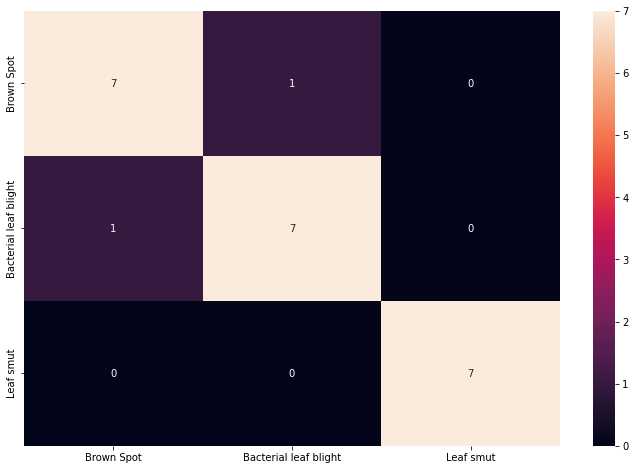

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(conf_mat,annot=True,xticklabels=['Brown Spot','Bacterial leaf blight','Leaf smut'],
            yticklabels=['Brown Spot','Bacterial leaf blight','Leaf smut'])

In [37]:
#printing accuracy score
print(accuracy_score(y_test,y_predict))

0.9130434782608695


In [38]:
#classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00         7

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.92        23
weighted avg       0.91      0.91      0.91        23



## Evaluation Summary

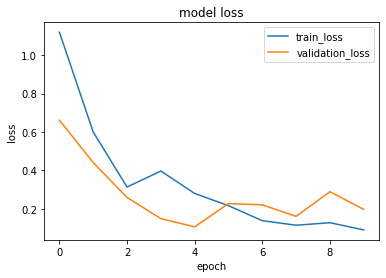

In [39]:
# summarize history for loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label = 'validation_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

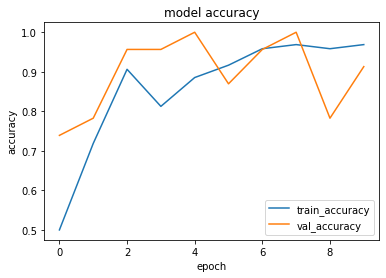

In [40]:
# summarize history for accuracy
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Conclusion:
    Here We have experimented with Xception Transfer Learning Model and It performed well in classification of our data. We observed that using transfer learning technique we are able to get good results within less number of epochs and with less time.
    
   